In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
path = '/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/auxiliaries/phyto_bloom_window/chlorphyll_data_geesthacht_full.csv'

df = pd.read_csv(path,delimiter=';',quotechar="'")

# convert date to datetime format
# 11.01.2012 with dd.mm.yyyy
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
df['Stromkilometer'] = df['Stromkilometer'].str.replace(',','.')
df['Stromkilometer'] = df['Stromkilometer'].astype(float)
df['Messwert'] = df['Messwert'].str.replace(',','.')
df['Messwert'] = pd.to_numeric(df['Messwert'], errors='coerce')

# seletec pre harborg data from geestacht 575 to 610
df = df[(df['Stromkilometer'] >= 585) & (df['Stromkilometer'] <= 610)]
df

,Gew?sser,Wasserk?rper,Messstelle,Stromkilometer,Parameter,Messwert,Einheit,Messwerttyp,Erfassungsart,Messwertart,Messvorgang,Datum,Bezugsjahr,Zeit,Datum bis,Zeit bis,Status,Analysemethode,Bemerkung (Datenausgabe),zus?tzliche Informationen
0,Elbe,Elbe (Ost),"Geesthacht (Strom-km 585,9)",585.9,Chlorophyll-A,6.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2008-01-09,NaN,13:05,NaN,NaN,freigegeben,-,NaN,NaN
1,Elbe,Elbe (Ost),"Geesthacht (Strom-km 585,9)",585.9,Chlorophyll-A,5.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2008-02-06,NaN,14:54,NaN,NaN,freigegeben,-,NaN,NaN
2,Elbe,Elbe (Ost),"Geesthacht (Strom-km 585,9)",585.9,Chlorophyll-A,19.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2008-03-05,NaN,13:40,NaN,NaN,freigegeben,-,NaN,NaN
3,Elbe,Elbe (Ost),"Geesthacht (Strom-km 585,9)",585.9,Chlorophyll-A,49.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2008-04-09,NaN,16:10,NaN,NaN,freigegeben,-,NaN,NaN
4,Elbe,Elbe (Ost),"Geesthacht (Strom-km 585,9)",585.9,Chlorophyll-A,110.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2008-05-14,NaN,13:00,NaN,NaN,freigegeben,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Elbe,Elbe (Ost),"Zollenspieker (Strom-km 598,7)",598.7,Chlorophyll-A,105.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2020-08-04,NaN,13:20,NaN,NaN,freigegeben,DIN 38412-16 (L16),NaN,NaN
466,Elbe,Elbe (Ost),"Zollenspieker (Strom-km 598,7)",598.7,Chlorophyll-A,84.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2020-09-01,NaN,12:10,NaN,NaN,freigegeben,DIN 38412-16 (L16),NaN,NaN
467,Elbe,Elbe (Ost),"Zollenspieker (Strom-km 598,7)",598.7,Chlorophyll-A,20.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2020-10-06,NaN,15:15,NaN,NaN,freigegeben,DIN 38412-16 (L16),NaN,NaN
468,Elbe,Elbe (Ost),"Zollenspieker (Strom-km 598,7)",598.7,Chlorophyll-A,7.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2020-11-02,NaN,12:56,NaN,NaN,freigegeben,DIN 38412-16 (L16),NaN,NaN


In [19]:
df['Messstelle'].unique()

array(['Geesthacht (Strom-km 585,9)', 'Zollenspieker (Strom-km 598,7)'],
      dtype=object)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
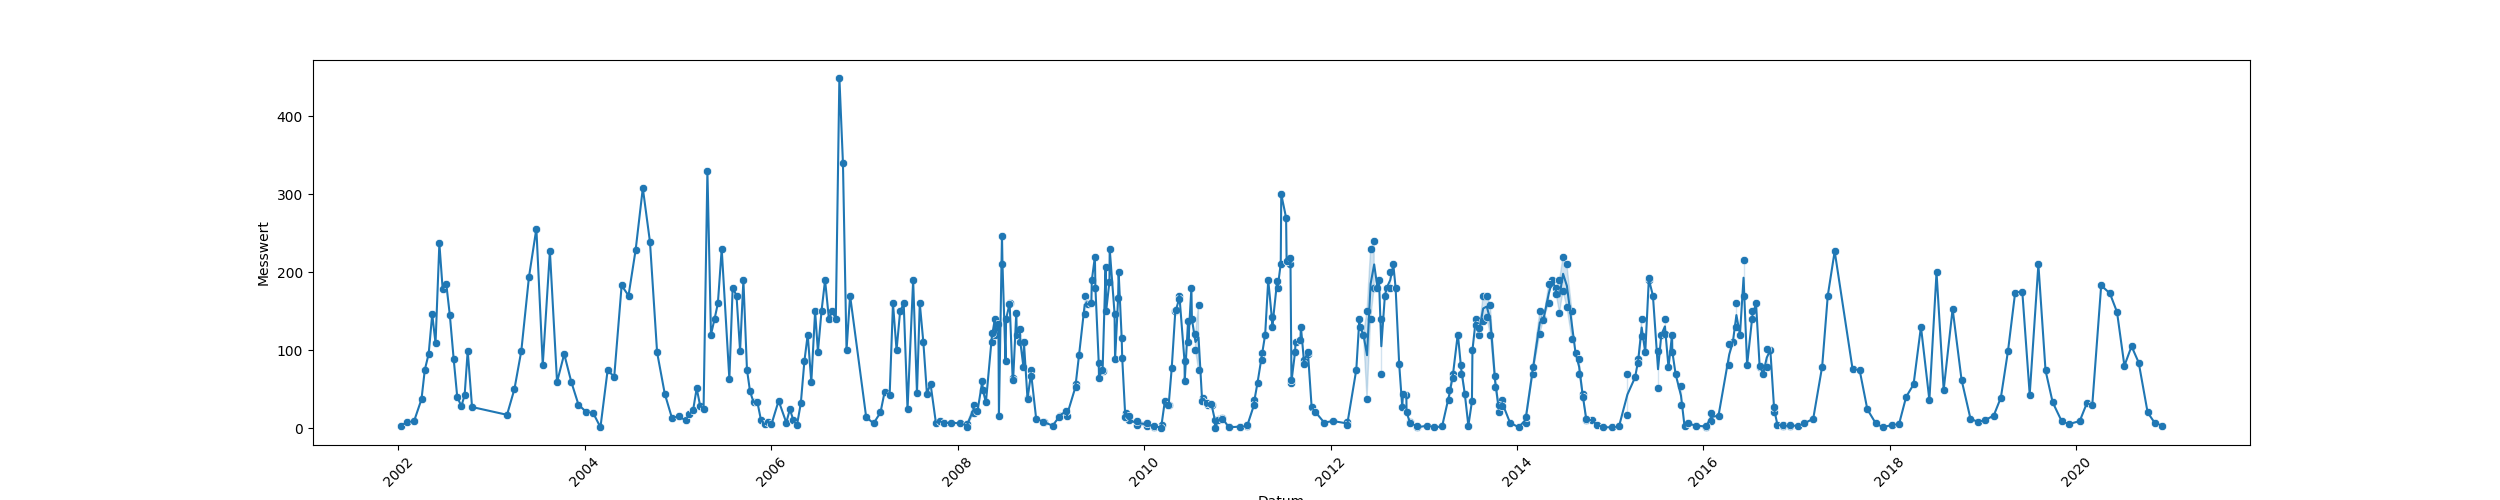

In [20]:
%matplotlib widget

fig,ax = plt.subplots(figsize=(25,5))

# lineplot with marker
sns.scatterplot(data=df, x="Datum", y="Messwert")
sns.lineplot(data=df, x="Datum", y="Messwert", markers=True, dashes=False, ax=ax)

# ticks every month
# _ = ax.xaxis.set_major_locator(plt.MaxNLocator(120))

# rotate xticks
_ = plt.xticks(rotation=45)